In [1]:
#I used public data available from the StockX Data Contest, which provided me with a dataset 
#of 99,956 transactions that occurred between 2017 and 2019. This dataset included two prominent 
#brands, Yeezy and Nike Off-White, as well as over 50 different sneaker styles.

#In an effort to enhance the dataset, I manually gathered information on colorways and the number of sales from 
#the StockX website. Subsequently, I converted style and color information into dummy variables. 

#For my modeling purposes, The "price premium" is calculated as the difference between the sale price of a 
#product (in this case, sneakers) and its original retail price. It represents how much more (or less) a 
#customer is willing to pay for a product compared to its original retail price. In other words, it quantifies 
#the additional amount that buyers are willing to spend, or the markup, above the standard retail cost for a 
#particular product.

#The input variables for my analysis included the number of days since  release, sneaker style, colorway, 
#shoe size, and the number of sales. These variables allowed me to develop models and gain insights into 
#the factors influencing sneaker prices in this market.

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
stockx_data = pd.read_excel("./StockX-Data-Contest-2019.xlsx",sheet_name="Raw Data")
color = pd.read_excel("./supplemental_data_colorway.xlsx",sheet_name="Sheet1")

In [8]:
# --- Data Cleaning ---
# calculate price premium: (sale price - retail price)/retail price
stockx_data["Price_Percentage_change"] = (stockx_data['Sale Price'] - stockx_data['Retail Price'])/stockx_data['Retail Price']

# calculate days since release: order data - release date
#stockx_data["Days_Since_Release"] = (pd.to_datetime(stockx_data['Order Date']) - pd.to_datetime(stockx_data['Release Date']))/np.timedelta64('1','D')

# --- style variables ---
# style: v2
stockx_data["yeezy"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Yeezy' in x.split("-") else 0)
# style: airjordan
stockx_data["airjordan"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Jordan' in x.split("-") else 0)
# style: airforce
stockx_data["airforce"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Force' in x.split("-") else 0)
# style: airmax90
stockx_data["airmax90"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if '90' in x.split("-") else 0)
# style: airmax97
stockx_data["airmax97"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if '97' in x.split("-") else 0)
# style: presto
stockx_data["presto"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Presto' in x.split("-") else 0)
# style: vapormax
stockx_data["vapormax"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'VaporMax' in x.split("-") else 0)
# style: blazer
stockx_data["blazer"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Blazer' in x.split("-") else 0)
# style: zoom
stockx_data["zoom"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Zoom' in x.split("-") else 0)
# style: zoom
stockx_data["react"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'React' in x.split("-") else 0)

# --- state variables ---
# creating the california variable
stockx_data["California"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'California' in x else 0)
# creating the new_york variable
stockx_data["New York"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'New York' in x else 0)
# creating the oregon variable
stockx_data["Oregon"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Oregon' in x else 0)
# creating the florida variable
stockx_data["Florida"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Florida' in x else 0)
# creating the texas variable
stockx_data["Texas"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Texas' in x else 0)
# creating the other_state variable
above5pct_states = ["California", "New York", "Oregon", "Florida", "Texas"]
stockx_data["Other States"] = pd.Series(list(map(int,~stockx_data["Buyer Region"].isin(above5pct_states))))


In [10]:
stockx_data = stockx_data.merge(color, left_on = 'Sneaker Name', right_on = 'Style', how = 'left')

In [13]:
# drop columns that have been coded
# keep retail and sales prices for further analysis
# stockx_data = stockx_data.drop(columns = ['Retail Price','Order Date', 'Brand','Sneaker Name', 'Release Date', 'Buyer Region',
#                                          'Website', 'Product Line', 'Style','weeknum', 'Nike Air Force', 'Adidas Yeezy', 
#                                           'Nike Air Max', 'Nike Zoom','Nike Air VaporMax', 'Nike Blazers', 'Air Jordan', 
#                                           'Nike React','Nike Presto'])
stockx_data = stockx_data.drop(columns = ['Order Date', 'Brand','Sneaker Name','Buyer Region',
                                         'Website', 'Product Line', 'Style'])

In [15]:
# turn all the nan value to the 0
stockx_data = stockx_data.fillna(0)

In [16]:
stockx_data['Release Date'] = pd.to_datetime(stockx_data['Release Date'], infer_datetime_format=True)

In [17]:
year = stockx_data['Release Date'].dt.year
print(year)
print("-------------------")
print(year.unique())

0        2016
1        2016
2        2016
3        2016
4        2017
         ... 
99951    2018
99952    2018
99953    2018
99954    2018
99955    2018
Name: Release Date, Length: 99956, dtype: int64
-------------------
[2016 2017 2015 2018 2019]


In [18]:
stock_train = stockx_data[stockx_data['Release Date'].dt.year < 2019]
stock_test = stockx_data[stockx_data['Release Date'].dt.year >= 2019]

print(stock_train.shape, stock_test.shape)

(98585, 33) (1371, 33)


In [19]:
def plot_entire_series(x, y, **kwargs):
    
    plt.figure(figsize=(16, 4))
    plt.plot(x, y, linewidth=2, color='black')
    
    for key, value in kwargs.items():
        plt.plot(x, value, linewidth=2, color=key)
        
    plt.xlabel('Release Date', fontsize=16)
    plt.ylabel('Price_Percentage_change', fontsize=16)
    plt.show()
    
    return None

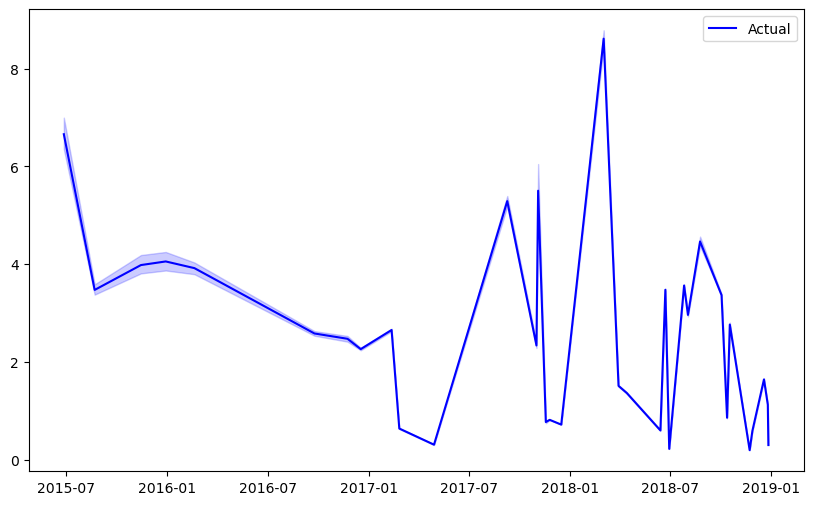

In [37]:
x = stock_train['Release Date'].to_numpy()
y = stock_train['Price_Percentage_change'].to_numpy()
plt.figure(figsize=(10, 6))
sns.lineplot(x = stock_train['Release Date'].to_numpy(), y = stock_train['Price_Percentage_change'].to_numpy(), label='Actual', color='blue')
#sns.lineplot(x = x, y = y, label='Price Percentage Change', linestyle='--', color='red')
plt.show()


In [21]:
#Linear trend
time_period = list(range(len(stock_train)))

stock_train_lm = stock_train.copy()
stock_train_lm['TimePeriod'] = time_period
stock_train_lm.tail()

,Sale Price,Retail Price,Release Date,Shoe Size,Price_Percentage_change,yeezy,airjordan,airforce,airmax90,airmax97,...,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales,TimePeriod
99951,565.0,220,2018-12-26,8.0,1.568182,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085,98580
99952,598.0,220,2018-12-26,8.5,1.718182,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085,98581
99953,605.0,220,2018-12-26,5.5,1.750000,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085,98582
99954,650.0,220,2018-12-26,11.0,1.954545,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085,98583
99955,640.0,220,2018-12-26,11.5,1.909091,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085,98584


In [22]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Price_Percentage_change ~ TimePeriod', data=stock_train_lm).fit()

print(lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Price_Percentage_change   R-squared:                       0.046
Model:                                 OLS   Adj. R-squared:                  0.046
Method:                      Least Squares   F-statistic:                     4717.
Date:                     Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                             20:55:11   Log-Likelihood:            -1.7837e+05
No. Observations:                    98585   AIC:                         3.567e+05
Df Residuals:                        98583   BIC:                         3.568e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

In [23]:
x = stock_train['Release Date'].to_numpy()
y = stock_train['Price_Percentage_change'].to_numpy()
y_pred = lm.predict(stock_train_lm).to_numpy()


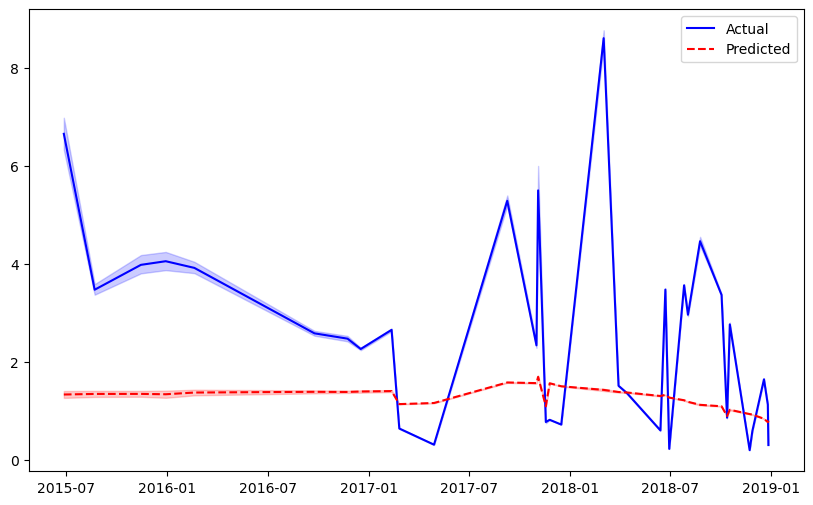

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = stock_train['Release Date'].to_numpy(), y = stock_train['Price_Percentage_change'].to_numpy(), label='Actual', color='blue')
sns.lineplot(x = x, y=y_pred, label='Predicted', linestyle='--', color='red')
plt.show()

In [25]:
#Random Walk models
stock_train_rw = stock_train.copy()

stock_train_rw['SalesYesterday'] = stock_train['Price_Percentage_change'].shift(1)
stock_train_rw.head()

,Sale Price,Retail Price,Release Date,Shoe Size,Price_Percentage_change,yeezy,airjordan,airforce,airmax90,airmax97,...,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales,SalesYesterday
0,1097.0,220,2016-09-24,11.0,3.986364,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1857,NaN
1,685.0,220,2016-11-23,11.0,2.113636,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,560,3.986364
2,690.0,220,2016-11-23,11.0,2.136364,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,520,2.113636
3,1075.0,220,2016-11-23,11.5,3.886364,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,808,2.136364
4,828.0,220,2017-02-11,11.0,2.763636,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2153,3.886364


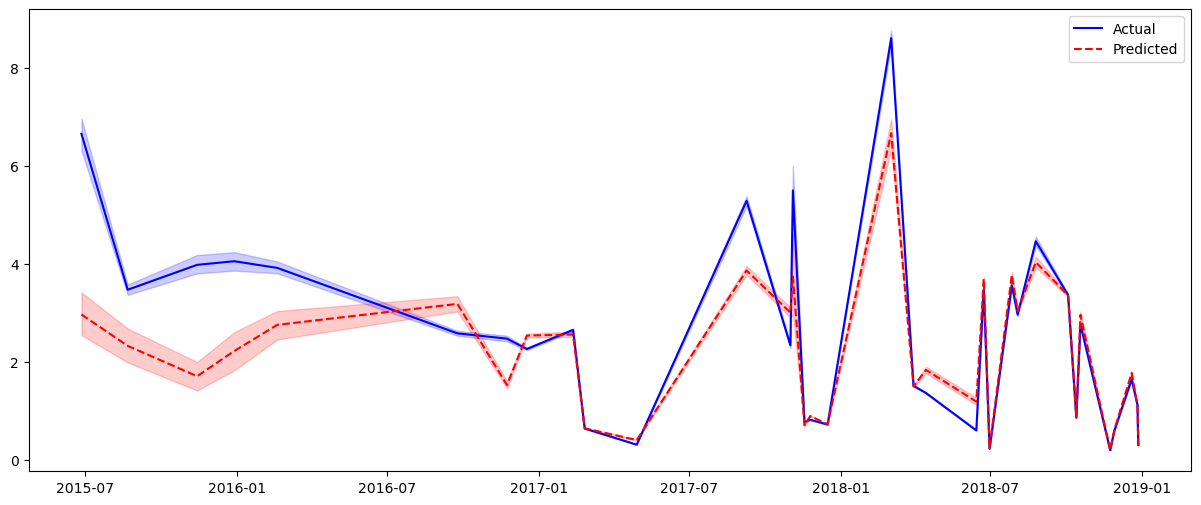

In [26]:
x = stock_train_rw['Release Date'].to_numpy()
y = stock_train_rw['Price_Percentage_change'].to_numpy()
y_pred_rw = stock_train_rw['SalesYesterday'].to_numpy()


plt.figure(figsize=(15, 6))
sns.lineplot(x = stock_train['Release Date'].to_numpy(), y = stock_train['Price_Percentage_change'].to_numpy(), label='Actual', color='blue')
sns.lineplot(x = x, y=y_pred_rw, label='Predicted', linestyle='--', color='red')
plt.show()

In [27]:
print((abs(stock_train_rw['Price_Percentage_change'] - 
           stock_train_rw['SalesYesterday']) >= 1000).value_counts())

False    98585
dtype: int64


In [28]:
from sklearn.metrics import r2_score

# Here we slice the series using [1:] in order to discard the first entry which corresponds to a NaN.
print('Training R2:', round(r2_score(stock_train_rw['Price_Percentage_change'][1:], stock_train_rw['SalesYesterday'][1:]), 5))

Training R2: 0.51776


In [29]:
#Auto regressive models

stock_train_ar = stock_train_rw.copy()
ar1 = smf.ols(formula='Price_Percentage_change ~ SalesYesterday', data=stock_train_ar).fit()
print(ar1.summary())

                               OLS Regression Results                              
Dep. Variable:     Price_Percentage_change   R-squared:                       0.576
Model:                                 OLS   Adj. R-squared:                  0.576
Method:                      Least Squares   F-statistic:                 1.339e+05
Date:                     Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                             20:55:28   Log-Likelihood:            -1.3839e+05
No. Observations:                    98584   AIC:                         2.768e+05
Df Residuals:                        98582   BIC:                         2.768e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

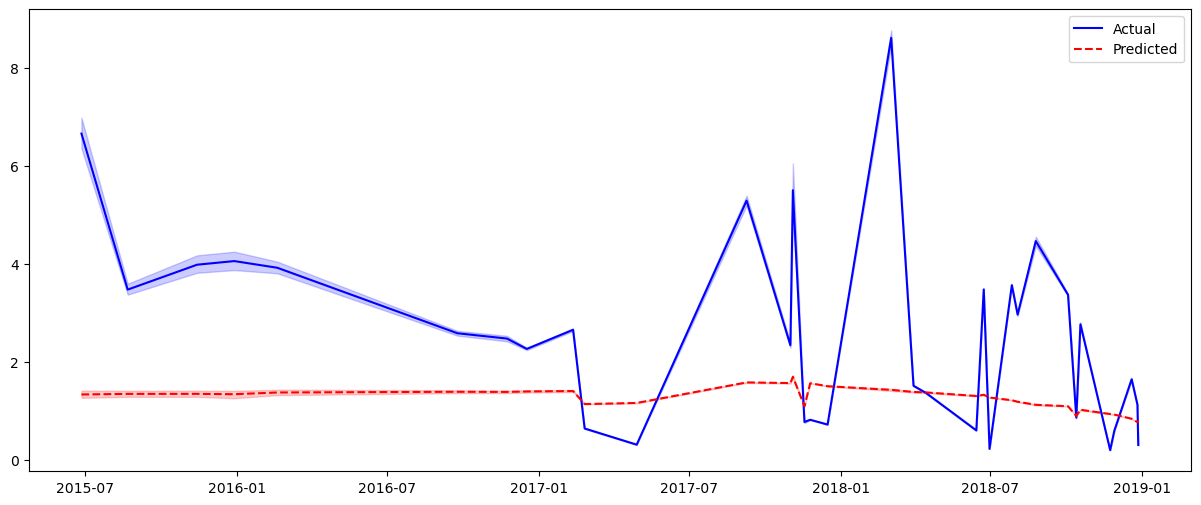

In [30]:
x = stock_train_ar['Release Date'].to_numpy()
y = stock_train_ar['Price_Percentage_change'].to_numpy()
y_pred_ar = ar1.predict(stock_train_ar).to_numpy()


plt.figure(figsize=(15, 6))
sns.lineplot(x = stock_train['Release Date'].to_numpy(), y = stock_train['Price_Percentage_change'].to_numpy(), label='Actual', color='blue')
sns.lineplot(x = x, y=y_pred, label='Predicted', linestyle='--', color='red')
plt.show()


In [31]:
print((abs(stock_train_ar['Price_Percentage_change'] - ar1.predict(stock_train_ar))
       >= 1000).value_counts())

False    98585
dtype: int64


In [32]:
#Higher order suto regressive model
stock_train_ar['SalesTwoDaysAgo'] = stock_train['Price_Percentage_change'].shift(2)

ar2 = smf.ols(formula='Price_Percentage_change ~ SalesYesterday + SalesTwoDaysAgo', data=stock_train_ar).fit()
print(ar2.summary())

                               OLS Regression Results                              
Dep. Variable:     Price_Percentage_change   R-squared:                       0.599
Model:                                 OLS   Adj. R-squared:                  0.599
Method:                      Least Squares   F-statistic:                 7.376e+04
Date:                     Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                             20:55:37   Log-Likelihood:            -1.3557e+05
No. Observations:                    98583   AIC:                         2.711e+05
Df Residuals:                        98580   BIC:                         2.712e+05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [33]:
#Incorporating Seasonality 
stock_train_ar['Month'] = stock_train_ar['Release Date'].dt.month_name()
stock_train_ar['DayWeek'] = stock_train_ar['Release Date'].dt.day_name()
stock_train_ar.head()


,Sale Price,Retail Price,Release Date,Shoe Size,Price_Percentage_change,yeezy,airjordan,airforce,airmax90,airmax97,...,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales,SalesYesterday,SalesTwoDaysAgo,Month,DayWeek
0,1097.0,220,2016-09-24,11.0,3.986364,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1857,NaN,NaN,September,Saturday
1,685.0,220,2016-11-23,11.0,2.113636,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,560,3.986364,NaN,November,Wednesday
2,690.0,220,2016-11-23,11.0,2.136364,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,520,2.113636,3.986364,November,Wednesday
3,1075.0,220,2016-11-23,11.5,3.886364,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,808,2.136364,2.113636,November,Wednesday
4,828.0,220,2017-02-11,11.0,2.763636,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,2153,3.886364,2.136364,February,Saturday


In [34]:
avg_increase_by_month = stock_train_ar.groupby('Month', sort=False).mean()['Price_Percentage_change']
avg_increase_by_month

C:\Users\priya\AppData\Local\Temp\ipykernel_40092\663659737.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_increase_by_month = stock_train_ar.groupby('Month', sort=False).mean()['Price_Percentage_change']


Month
September    4.906214
November     0.845892
February     0.852075
December     0.833319
April        0.469476
June         1.144388
August       3.289259
March        2.880058
July         3.565433
October      2.634669
Name: Price_Percentage_change, dtype: float64

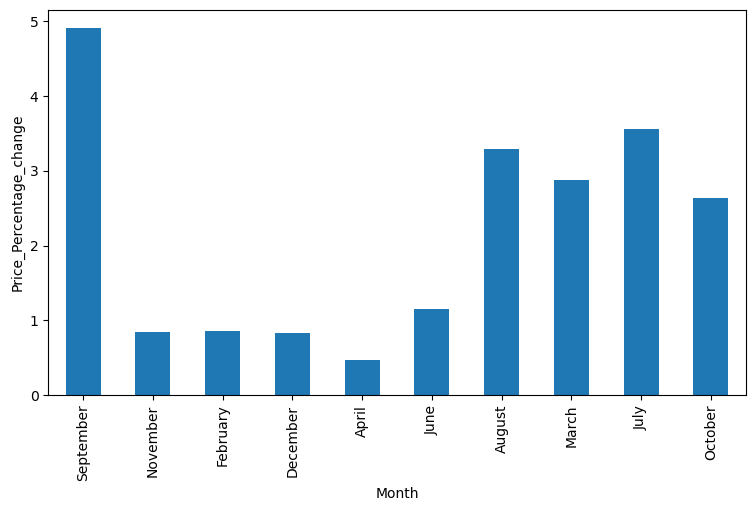

In [35]:
plt.figure(figsize=(9, 5))
avg_increase_by_month.plot(kind="bar")
plt.ylabel('Price_Percentage_change')
plt.xlabel('Month')
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_40092\3432904164.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_increase_by_day = stock_train_ar.groupby('DayWeek', sort=False).mean()['Price_Percentage_change']


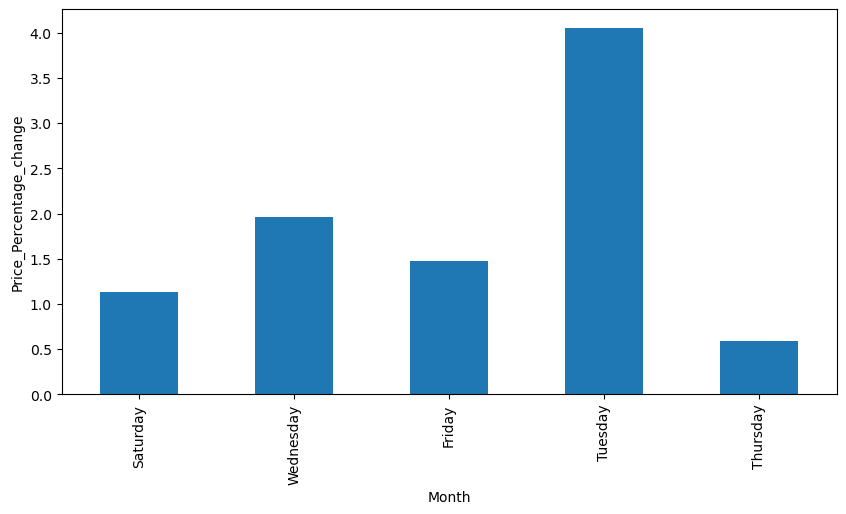

In [36]:
avg_increase_by_day = stock_train_ar.groupby('DayWeek', sort=False).mean()['Price_Percentage_change']

plt.figure(figsize=(10, 5))
avg_increase_by_day.plot(kind="bar")
plt.ylabel('Price_Percentage_change')
plt.xlabel('Month')
plt.show()